* **Reference : **

    * **https://medium.com/analytics-vidhya/predict-who-survived-the-titanic-disaster-with-automated-machine-learning-acec10715cd8**

# Predict Who Survived the Titanic Disaster With Automated Machine Learning

## 1.0 Importing libraries and dataset : 

In [2]:
import pandas as pd
import numpy as np
from pycaret.classification import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 200)

In [3]:
train = pd.read_csv('C:\\Users\\Raj_jhumpa\\Downloads\\My Projects\\Machine Learning\\Datasets\\Titanic Dataset\\train.csv')
test = pd.read_csv('C:\\Users\\Raj_jhumpa\\Downloads\\My Projects\\Machine Learning\\Datasets\\Titanic Dataset\\test.csv')
sub = pd.read_csv( 'C:\\Users\\Raj_jhumpa\\Downloads\\My Projects\\Machine Learning\\Datasets\\Titanic Dataset\\gender_submission.csv')

In [6]:
'''Train data'''
train.head()

'''Test data'''
test.head()

'''Gender_data'''
sub.head()

'Train data'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'Test data'

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


'Gender_data'

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


##  2.0 Setting up the data for model building : 

In [8]:
# checking for missing values : 

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Checking for data types : 

train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 3.0 Model Building : 

In [10]:
clf = setup(data = train,
            target = 'Survived', 
            numeric_imputation='mean',
            categorical_features= ['Sex', 'Embarked'],
            ignore_features= ['Cabin', 'Name', 'Ticket'],
            silent= True)

Setup Succesfully Completed!


,Description,Value
0,session_id,4251
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [12]:
# Comparing Models : 

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.8216,0.8659,0.6947,0.8201,0.7469,0.6115,0.6207,1.8259
1,Extreme Gradient Boosting,0.8137,0.8609,0.6947,0.8040,0.7383,0.5958,0.6057,0.1237
2,Light Gradient Boosting Machine,0.8121,0.8670,0.7322,0.7745,0.7490,0.5995,0.6037,0.1136
3,Gradient Boosting Classifier,0.8089,0.8645,0.6989,0.7867,0.7345,0.5869,0.5946,0.0886
4,Ada Boost Classifier,0.8073,0.8380,0.7572,0.7553,0.7509,0.5945,0.6001,0.0802
5,Logistic Regression,0.8056,0.8476,0.7109,0.7724,0.7359,0.5829,0.5884,0.0476
6,Random Forest Classifier,0.7991,0.8277,0.7112,0.7593,0.7301,0.5708,0.5757,0.1116
7,Linear Discriminant Analysis,0.7976,0.8471,0.6942,0.7636,0.7231,0.5647,0.5699,0.0053
8,Ridge Classifier,0.7960,0.0000,0.6942,0.7595,0.7216,0.5615,0.5663,0.0044
9,Extra Trees Classifier,0.7832,0.8211,0.7112,0.7237,0.7141,0.5399,0.5433,0.1484


* **Usually we take accuracy into account in such case but let go for the Light GBM model.**

In [13]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8254,0.8488,0.6250,0.8824,0.7317,0.6078,0.6277
1,0.9048,0.9290,0.8750,0.8750,0.8750,0.7981,0.7981
2,0.7460,0.8472,0.6667,0.6667,0.6667,0.4615,0.4615
3,0.8226,0.8963,0.7391,0.7727,0.7556,0.6164,0.6168
4,0.7581,0.8235,0.6250,0.7143,0.6667,0.4781,0.4807
5,0.7903,0.8421,0.7500,0.7200,0.7347,0.5615,0.5618
6,0.7742,0.9035,0.8333,0.6667,0.7407,0.5451,0.5557
7,0.8387,0.8103,0.7083,0.8500,0.7727,0.6493,0.6558
8,0.7742,0.8706,0.6667,0.7273,0.6957,0.5167,0.5179
9,0.8871,0.8991,0.8333,0.8696,0.8511,0.7602,0.7607


In [14]:
# Model Tuning : 

tuned_lgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8254,0.8622,0.5417,1.0000,0.7027,0.5940,0.6500
1,0.8730,0.9348,0.8333,0.8333,0.8333,0.7308,0.7308
2,0.7778,0.8526,0.6250,0.7500,0.6818,0.5132,0.5183
3,0.8226,0.8495,0.7391,0.7727,0.7556,0.6164,0.6168
4,0.8226,0.8405,0.6250,0.8824,0.7317,0.6049,0.6249
5,0.8065,0.8755,0.7917,0.7308,0.7600,0.5983,0.5996
6,0.8065,0.8750,0.8333,0.7143,0.7692,0.6043,0.6096
7,0.7581,0.7538,0.6250,0.7143,0.6667,0.4781,0.4807
8,0.7903,0.8618,0.6250,0.7895,0.6977,0.5405,0.5491
9,0.8065,0.8646,0.7083,0.7727,0.7391,0.5857,0.5871


In [15]:
tuned_lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.3, max_depth=90,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=200, n_jobs=-1, num_leaves=150, objective=None,
               random_state=4251, reg_alpha=0.1, reg_lambda=0.8, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## 4.0 Analyzing Model Performance with Plots : 

### 4.1 Learning Curve : 

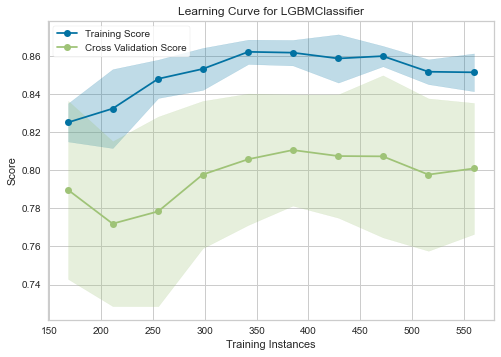

In [16]:
plot_model(tuned_lgbm, plot = 'learning')

### 4.2 AUC Curve : 

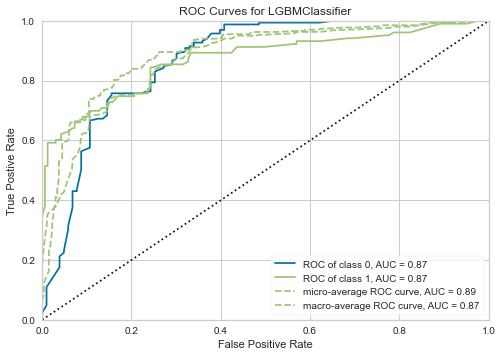

In [17]:
plot_model(tuned_lgbm, plot = 'auc')

### 4.3 Confusion Matrix : 

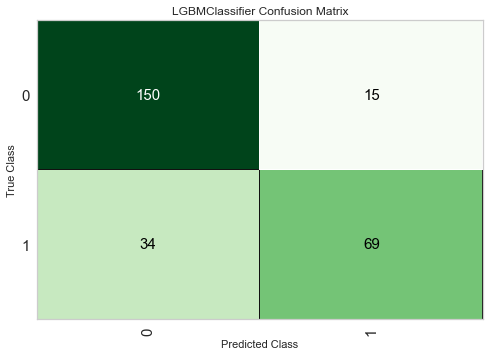

In [19]:
plot_model(tuned_lgbm, plot = 'confusion_matrix')

### 4.4 Feature Importance : 

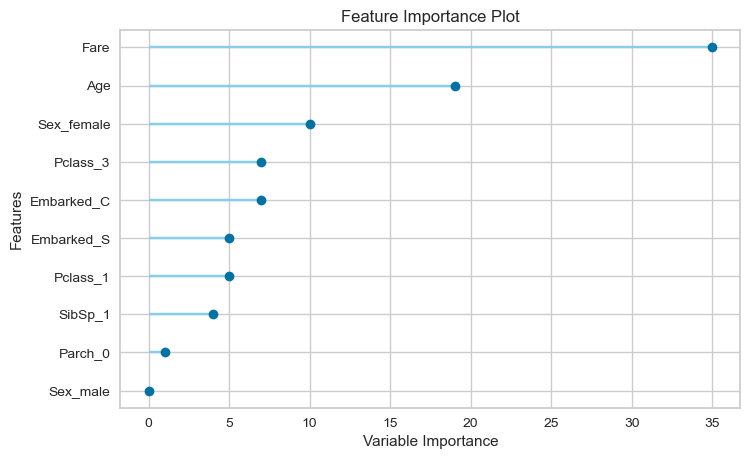

In [20]:
plot_model(tuned_lgbm, plot = 'feature')

### 4.5 Model Interpretation : 

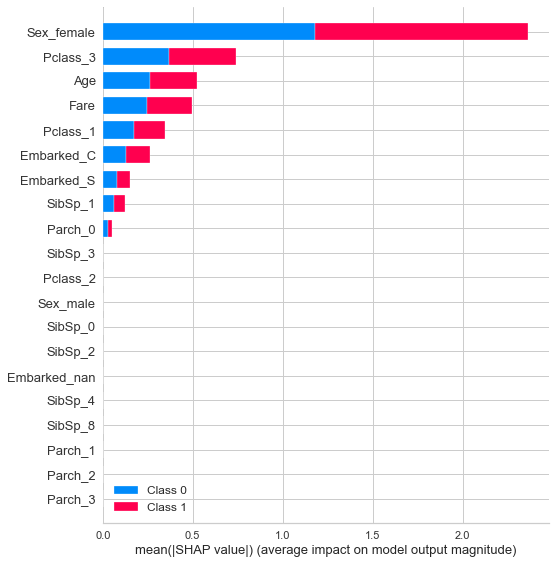

In [22]:
interpret_model(tuned_lgbm)

## 5.0 Making predictions on test data : 

In [23]:
# predictions on train data : 

predict_model(tuned_lgbm, data = test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.1129
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0.5822
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0929
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.1121
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.4560
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.1413
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9379
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.0765
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.1413


In [26]:
# predictions on test data : 

predict_model(tuned_lgbm, data = test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.1129
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0.5822
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0929
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.1121
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.4560
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.1413
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9379
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.0765
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.1413
